M2780.002400 Machine Listening (Fall 2020)

Instructor: Kyogu Lee (kglee@snu.ac.kr)

# Assignment 5: Linear Regression and Logistic Regression

(75 points)

**Due Date : This assignment is due by 12:59PM, October 13 (Tuesday)**



---

Assignment

Each assignment is composed of two parts: a) in the theory part, you are required to solve the problem set, write down your answers on paper (also, typing your answers using PC or tablet PC is fine), and upload the scanned version (**아무개_hw5.pdf**) via **ETL**; b) for the lab assignment, you will need to write Notebook scripts (**아무개_hw5.ipynb**) and/or functions as required and submit them electronically (via **ETL**) by the end of the due date.

# Theory (35 pts)


---



1.   Logistic Regression (5 pts)


 Suppose you train a logistic regression classifier and your hypothesis function is $ H_\theta(x) = g(\theta_0 + \theta_1 x_1 + \theta_2 x_2)$. Where $g$ is logistic function and $\theta_0$, $\theta_1$ , and $\theta_2$ are 6, 0, and -1, respectively. Draw the decision boundaries for classification and indicate where the positive prediction is.
 
 
![](https://doc-0k-4c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/dpqho7mavfhe9duhrujd8ho9jmjg35aa/1571882400000/01830637789438172170/*/1URyvismEm3oUunwZur7GSEua3BmMZjLb)


---



2.   Logistic function (10 pts)


 The logistic (sigmoid) function is defined as $g(z) = \frac{1}{1+e^{-z}}$ . It is known that the logistic function is easy to differentiate because it has a simple derivative $\frac{\partial }{\partial z} g(z) = g(z) (1-g(z))$ . Derive this equation.



---



3.   Gradient descent for logistic regression (20 pts)


 Using the equation above, derive the gradient descent algorithm for logistic regression.




---



4.   (optional) Cost function for logistic regression (20 pts)


 Derive the cost function $J(\theta)$ from the perspective of the maximum (log)likelihood; i.e., by maximizing the joint probability of $m$ training samples being correctly classified. (HINT: the probability of $y = 1$ or $0$ , given $x$, parameterized by $\theta$ can be written more compactly as $P(y|x;\theta) = (h_\theta (x))^y (1 - h_\theta (x))^{1-y}$ )



# Lab (40pts)

For all lab assignments, submit your Notebook file (**아무개_hw5.ipynb**) via **ETL**. The Notebook file should be named with your full name and the homework number – e.g., **아무개_hw5.ipynb**. 

In addition to writing Python scripts and/or functions in your Notebook file, there are also questions you’ll have to answer. For such questions, you should provide answers in your Notebook file using Text sections.

**Please submit the codes executed (make sure that the results of your codes are visible in the submitted assignments) so that the grader can check whether the code is working or not.**


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


---


1.   Linear Regression (20 pts)



*   a. Download Auto_Insurance_description.txt and Auto_Insurance.csv from course homepage or ETL (lab data). Read the data descriptions provided in Auto_Insurance_description.txt. Load Auto_Insurance.csv to your notebook session and plot the data using matplotlib.pyplot.scatter.

*   b. Fit a linear regression model estimating the total payment for all the claims Swedish Kronor form the number of claims made. Plot the regression line over the scatterplot of the data. Plot the change of the cost calculated by the cost function as the model fits. 


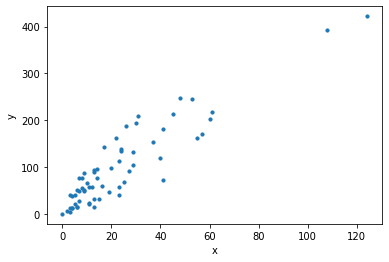

In [8]:
# a)
csv_path = './lab5/data/Auto_Insurance.csv'
data = pd.read_csv(csv_path, header=None)
x = data.iloc[:, 0][1:].values.astype(np.float)
y = data.iloc[:, 1][1:].values.astype(np.float)
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [9]:
# linear regression model
m = 0
c = 0

X = x
Y = y
L = 0.0001
epochs = 100000

n = float(len(X))
ms = []
cs = []
costs = []
def cost(X, Y, m, c):
    n = float(len(X))
    Y_pred = m * X + c
    error = sum((Y - Y_pred) * (Y - Y_pred)) / n
    return error

# Gradient Descent
for i in range(epochs):
    ms.append(m)
    cs.append(c)
    costs.append(cost(X, Y, m, c))
    Y_pred = m * X + c
    D_m = (-2 / n) * sum(X * (Y - Y_pred))
    D_c = (-2 / n) * sum(Y - Y_pred)
    m = m - L * D_m
    c = c - L * D_c

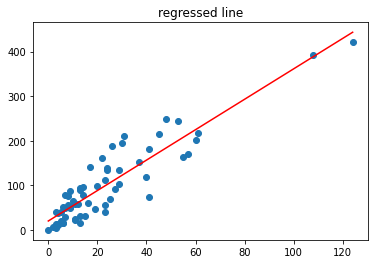

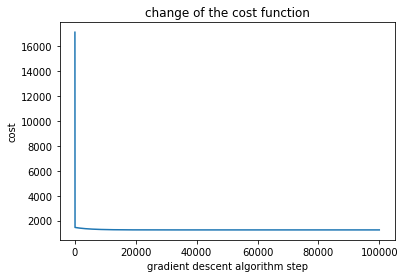

In [11]:
# b)
Y_pred_final = m * X + c
plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')
plt.title('regressed line')
plt.show()

step = np.arange(epochs)
plt.plot(step, costs)
plt.title('change of the cost function')
plt.xlabel('gradient descent algorithm step')
plt.ylabel('cost')
plt.show()


---


2.   Logistic Regression (20 pts)

 
 
*   a. Download haberman.data and Haberman.names from course homepage or ETL (lab data). Read the data descriptions provided in Haberman.names. Load haberman.data to your notebook session and plot the data. You may need to use 3d plotting technique.


*   b. Fit a logistic regression model estimating the survival status. Plot the regression plane over the scatterplot of the data.

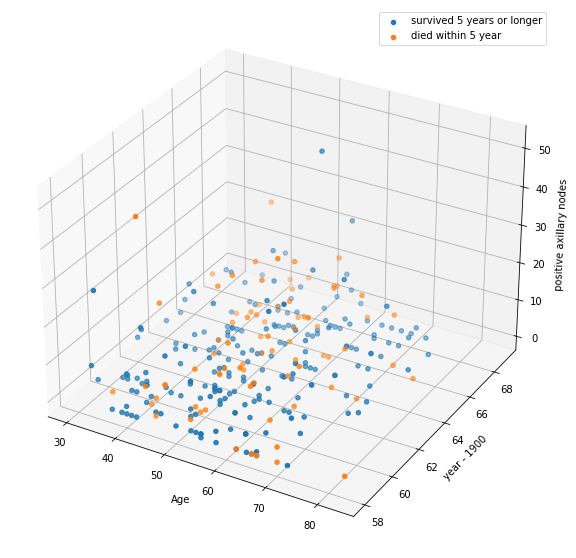

In [54]:
# a)
data_path = './lab5/data/haberman.data'
data = pd.read_csv(data_path, header=None)
x = data.iloc[:, :-1]
y = data.iloc[:, -1] - np.ones_like(y)

survived = data.loc[y == 0]
died = data.loc[y == 1]

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

ax.scatter(survived.iloc[:, 0], survived.iloc[:, 1], survived.iloc[:, 2], 
           label = 'survived 5 years or longer')
ax.scatter(died.iloc[:, 0], died.iloc[:, 1], died.iloc[:, 2], 
           label='died within 5 year')
ax.set_xlabel('Age')
ax.set_ylabel('year - 1900')
ax.set_zlabel('positive axillary nodes')
ax.legend()
plt.show()

In [55]:
class myLogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            if(self.verbose == True and i % 10000 == 0):
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
                print(f'loss: {self.__loss(h, y)} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold

In [37]:
model = myLogisticRegression(lr=0.05, num_iter=1000000)
model.fit(x,y)

0.7483660130718954
[-10.86077743  -0.19435336  -0.76844135   4.003789  ]


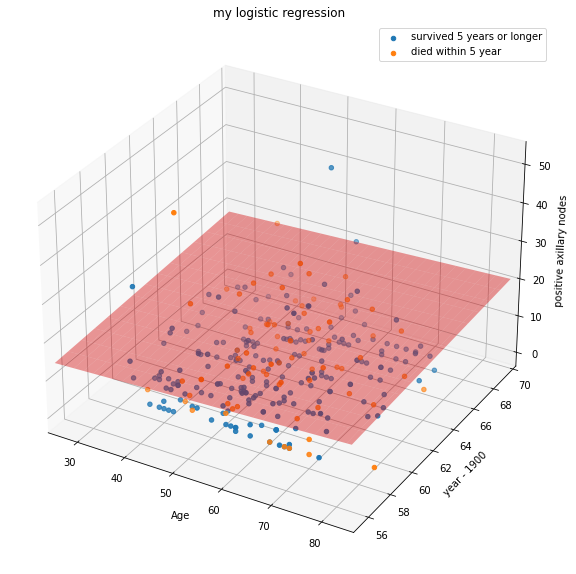

In [56]:
# b)
preds = model.predict(x, 0.5)
print((preds==y).mean())
print(model.theta)

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

ax.scatter(survived.iloc[:, 0], survived.iloc[:, 1], survived.iloc[:, 2], 
           label = 'survived 5 years or longer')
ax.scatter(died.iloc[:, 0], died.iloc[:, 1], died.iloc[:, 2], 
           label='died within 5 year')

z = lambda x, y: (-model.theta[0] - np.dot(model.theta[1], x) 
                  - np.dot(model.theta[2], y)) / model.theta[3]

tmp1 = np.linspace(25, 85, 60)
tmp2 = np.linspace(55, 70, 15)
a, b = np.meshgrid(tmp1, tmp2)
ax.plot_surface(a, b, z(a,b), alpha=0.4, color='red')
ax.set_xlabel('Age')
ax.set_ylabel('year - 1900')
ax.set_zlabel('positive axillary nodes')
ax.set_xlim(25, 85)
ax.set_ylim(55,70)
ax.set_title('my logistic regression')
ax.legend()



[[ 0.01988257 -0.00975411  0.08838822]]
[-1.86233569]


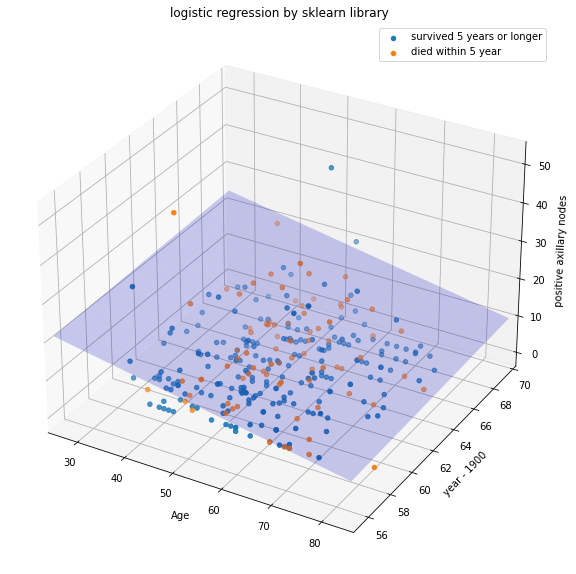

In [57]:
reg = LogisticRegression().fit(x, y)
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

ax.scatter(survived.iloc[:, 0], survived.iloc[:, 1], survived.iloc[:, 2], 
           label = 'survived 5 years or longer')
ax.scatter(died.iloc[:, 0], died.iloc[:, 1], died.iloc[:, 2], 
           label='died within 5 year')
z = lambda x, y: (-reg.intercept_[0] - np.dot(reg.coef_[0][0], x) 
                  - np.dot(reg.coef_[0][1], y)) / reg.coef_[0][2]
tmp1 = np.linspace(25, 85, 60)
tmp2 = np.linspace(55, 70, 15)
a, b = np.meshgrid(tmp1, tmp2)
ax.plot_surface(a, b, z(a,b), alpha=0.2, color='blue')
ax.set_xlabel('Age')
ax.set_ylabel('year - 1900')
ax.set_zlabel('positive axillary nodes')
ax.set_xlim(25, 85)
ax.set_ylim(55,70)
ax.set_title('logistic regression by sklearn library')
ax.legend()